In [102]:
import numpy as np
from py_linq import Enumerable
import matplotlib.pyplot as plt

In [103]:
grid = open('input.txt', encoding='utf-8').readlines()
grid = Enumerable(grid)\
    .select(lambda line: line.strip())\
    .select(lambda line: list(line))
grid = np.array(grid)
grid = grid.transpose()

grid, grid.shape

(array([['a', 'a', 'a', ..., 'a', 'a', 'a'],
        ['b', 'b', 'b', ..., 'b', 'b', 'b'],
        ['c', 'c', 'c', ..., 'c', 'c', 'c'],
        ...,
        ['a', 'a', 'a', ..., 'a', 'a', 'a'],
        ['a', 'a', 'a', ..., 'a', 'a', 'a'],
        ['a', 'a', 'a', ..., 'a', 'a', 'a']], dtype='<U1'),
 (113, 41))

In [104]:
start_pos = np.argwhere(grid == 'S')[0]
end_pos = np.argwhere(grid == 'E')[0]

start_pos, end_pos

(array([ 0, 20], dtype=int64), array([88, 20], dtype=int64))

In [105]:
def letter_to_height(c):
    if c.lower() == c:
        return ord(c) - 96
    if c == 'S':
        return letter_to_height('a')
    if c == 'E':
        return letter_to_height('z')

for test_letter in "a z S E".split():
    print(f'{test_letter} {letter_to_height(test_letter)}')

a 1
z 26
S 1
E 26


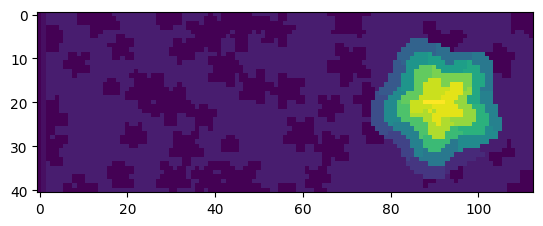

In [106]:
grid = np.vectorize(letter_to_height)(grid)
plt.imshow(grid.T)

In [107]:
all_directions = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([-1, 0]),
    np.array([0, -1]),
]

def pos_is_valid(pos):
    return 0 <= pos[0] < grid.shape[0] and 0 <= pos[1] < grid.shape[1]

def can_step(pos, direction):
    height = grid[pos[0], pos[1]]
    next_height = grid[pos[0] + direction[0], pos[1] + direction[1]]
    return next_height <= height + 1

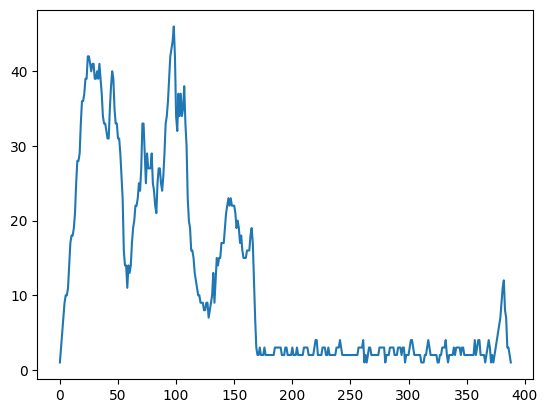

In [108]:
visited = np.zeros(grid.shape, dtype=bool)
visited[start_pos[0], start_pos[1]] = True
edge = [start_pos]
edge_timeline = []
current_dist = 0

found_dist = 0

while len(edge):
    edge_timeline.append(len(edge))
    new_edge = []
    for pos in edge:
        if np.all(pos == end_pos):
            found_dist = current_dist
        for direction in all_directions:
            next_pos = pos + direction
            if not pos_is_valid(next_pos):
                continue
            if visited[next_pos[0]][next_pos[1]]:
                continue
            if not can_step(pos, direction):
                continue
            visited[next_pos[0]][next_pos[1]] = True
            new_edge.append(next_pos)
    edge = new_edge
    current_dist += 1

plt.plot(edge_timeline)

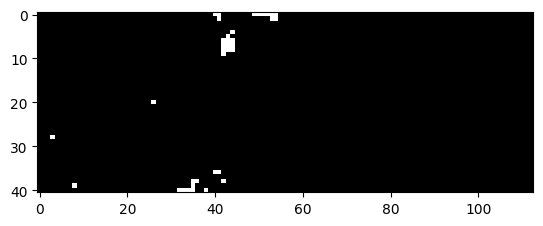

In [109]:
plt.imshow(visited.T, cmap='Greys')

In [110]:
found_dist

380

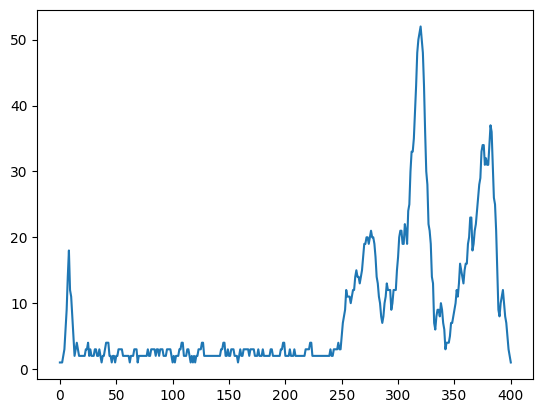

In [111]:
def can_step(pos, direction):
    height = grid[pos[0], pos[1]]
    next_height = grid[pos[0] + direction[0], pos[1] + direction[1]]
    return height <= next_height + 1

visited = np.zeros(grid.shape, dtype=bool)
visited[end_pos[0], end_pos[1]] = True
edge = [end_pos]
edge_timeline = []
current_dist = 0

found_dist = 0

while len(edge):
    edge_timeline.append(len(edge))
    new_edge = []
    for pos in edge:
        if found_dist == 0 and grid[pos[0], pos[1]] == letter_to_height('a'):
            found_dist = current_dist
        for direction in all_directions:
            next_pos = pos + direction
            if not pos_is_valid(next_pos):
                continue
            if visited[next_pos[0]][next_pos[1]]:
                continue
            if not can_step(pos, direction):
                continue
            visited[next_pos[0]][next_pos[1]] = True
            new_edge.append(next_pos)
    edge = new_edge
    current_dist += 1

plt.plot(edge_timeline)

In [112]:
found_dist

375